In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data loading 

data = pd.read_csv('apps.csv')


In [3]:
# Checking the head

data.head(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Checking the shape of the data
data.shape

(9659, 14)

In [5]:
# Checking the data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [6]:
# Dropping some columns, for we dont need them

data.drop(columns = ['Unnamed: 0','Genres','Current Ver','Android Ver'], axis =1, inplace =True)

In [7]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,"June 20, 2018"


In [8]:
# Checking for missing values

data.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [9]:
# Dealing with missing values. 
# Rating and Size has missing values of 1463 and 1227 respectively so i will apply the mean value

data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
data['Size'] = data['Size'].fillna(data['Size'].mean())

In [10]:
# Changing the Date from object dtype to date dtype

data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [11]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   object        
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   object        
 8   Content Rating  9659 non-null   object        
 9   Last Updated    9659 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 754.7+ KB


In [13]:
# Checking for duplicate values

data.duplicated().sum()

0

# Performing EDA

In [14]:
data.describe()

,Rating,Reviews,Size,Last Updated
count,9659.000000,9.659000e+03,9659.000000,9659
mean,4.173243,2.165926e+05,20.395327,2017-10-30 19:34:02.074748928
min,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,2.500000e+01,5.300000,2017-08-05 12:00:00
50%,4.200000,9.670000e+02,16.000000,2018-05-04 00:00:00
75%,4.500000,2.940100e+04,25.000000,2018-07-17 00:00:00
max,5.000000,7.815831e+07,100.000000,2018-08-08 00:00:00
std,0.494312,1.831320e+06,20.393893,NaN


In [15]:
data.describe(include ="object")

,App,Category,Installs,Type,Price,Content Rating
count,9659,9659,9659,9659,9659,9659
unique,9659,33,21,2,92,6
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,"1,000,000+",Free,0,Everyone
freq,1,1832,1417,8903,8903,7903


In [16]:
# Distribution of the data
df= data.drop('Reviews', axis = 1)

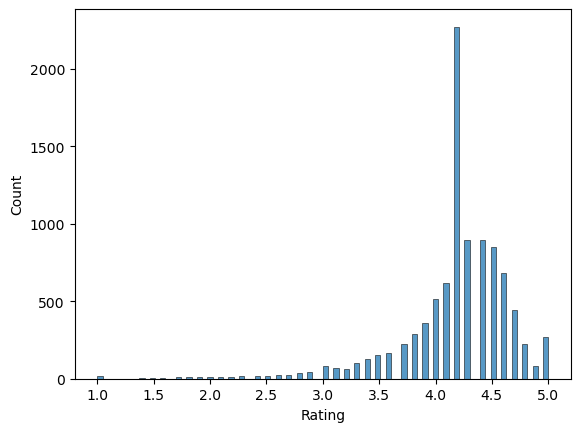

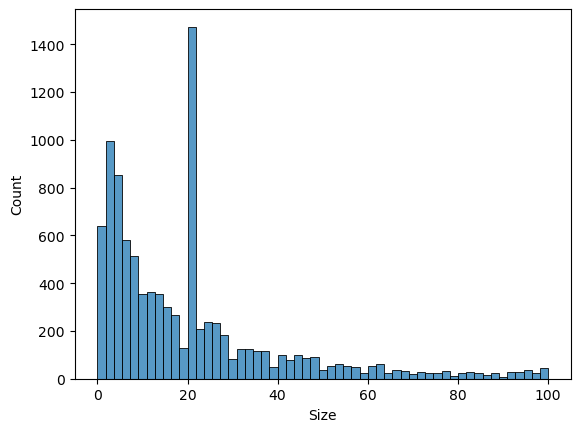

In [17]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data = df, x=i)
    plt.show()

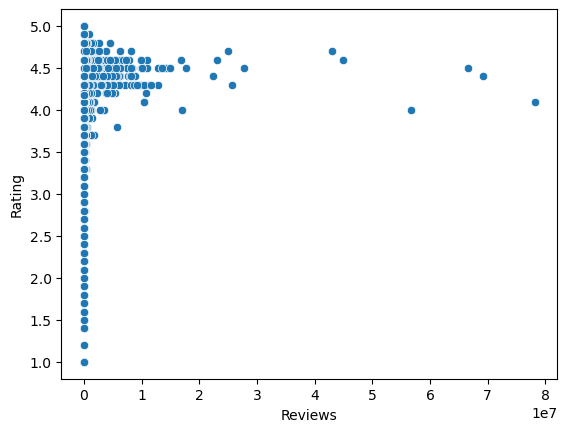

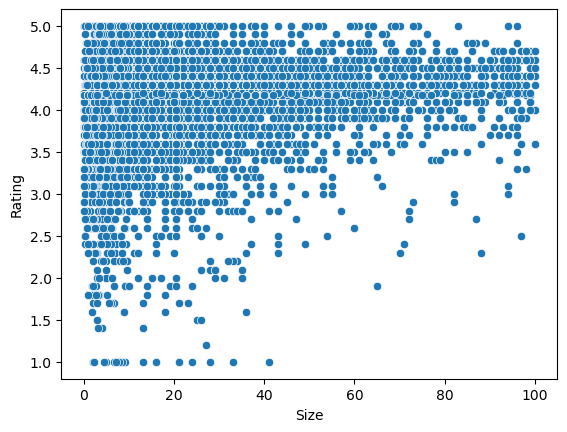

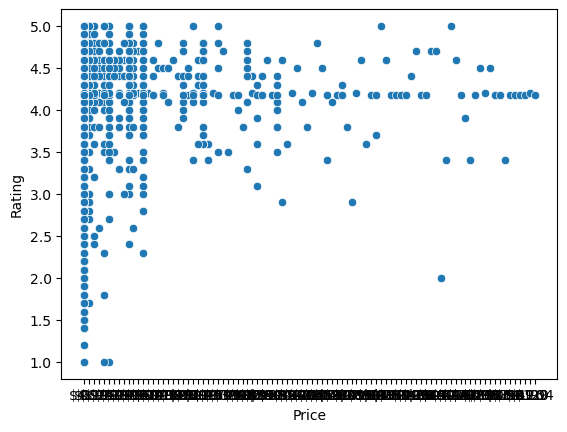

In [18]:
# Visualization of the relationship by scatter plot

for i in ['Reviews','Size','Price']:
    sns.scatterplot(data = data, x=i, y='Rating')
    plt.show()

In [19]:
data['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

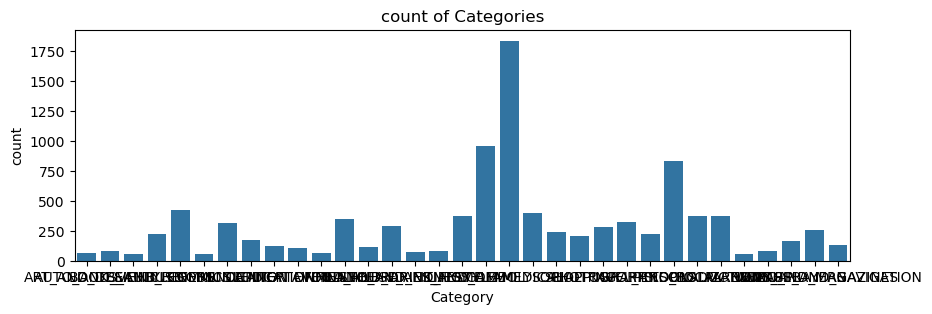

In [20]:
plt.figure(figsize = (10,3))
sns.countplot(x=df['Category'])
plt.title("count of Categories")
plt.show()

In [21]:
# Type by percentage and visualized

data['Type'].value_counts()

Type
Free    8903
Paid     756
Name: count, dtype: int64

In [22]:
print((data.groupby('Type')['Type'].count()/data['Type'].count())*100)

Type
Free    92.173103
Paid     7.826897
Name: Type, dtype: float64


<Axes: ylabel='Type'>

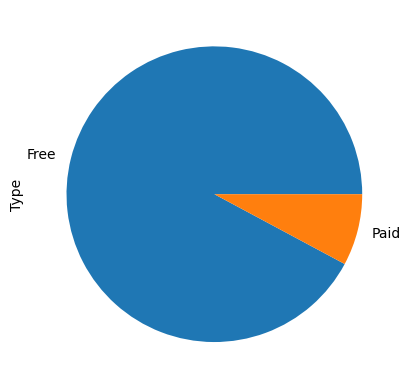

In [23]:
((data.groupby('Type')['Type'].count()/data['Type'].count())*100).plot.pie()

# Sentiment Analysis on user_review

In [24]:
# loading the review data for review sentiment analysis

df= pd.read_csv('user_reviews.csv')
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [25]:
# Checking the data head

df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [26]:
# Checking the data shape

df.shape

(64295, 5)

In [27]:
# Checking the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [28]:
# Dealing with missing values

df[df['Translated_Review'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [29]:
df[df['Translated_Review'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [30]:
df[df['Translated_Review'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [31]:
df[df['Translated_Review'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# Observation

The missing value in this dataset is the half of the dataset in which, if we are to carry out any Analysis with the messy data we can not get the accurate result, in the cause of large volume of the missing value, we are going to seek an approval of using the available data and to delete the null values records to perform the data Analysis and the sentiment Analysis. The available data will also be used to build the model on Sentiment Analysis, so that the result will be used to predict the subsequent incoming data.

In [32]:
df.dropna(inplace = True)

In [33]:
# Checking the null values

df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [34]:
# checking the shape after dropping null values. This is the data we ll be using for the rest of the analysis

print(df.shape)

(37427, 5)


In [35]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [36]:
# Renaming some columns

df.rename(columns ={'Translated_Review':'review','Sentiment':'remarks'}, inplace=True)

In [37]:
df.head()

,App,review,remarks,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [38]:
df.head()

,App,review,remarks,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [39]:
df['remarks'].value_counts()

remarks
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64

In [40]:
# 0 ---------> Nuetral
# 1----------> Positive
# -1----------> Negative


df['remarks'][df.iloc[:,2]=="Neutral"] = 0
df['remarks'][df.iloc[:,2]=="Positive"] = 1
df['remarks'][df.iloc[:,2]=="Negative"] = -1


C:\Users\user\AppData\Local\Temp\ipykernel_23628\2346985741.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['remarks'][df.iloc[:,2]=="Neutral"] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_23628\2346985741.py:6: SettingWithCopyWarni

In [41]:
df.head()

,App,review,remarks,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,1,0.40,0.875000
4,10 Best Foods for You,Best idea us,1,1.00,0.300000
5,10 Best Foods for You,Best way,1,1.00,0.300000


In [42]:
df['remarks'].dtype

dtype('O')

In [43]:
# converting the remarks dtype from object to float dtype


df['remarks'] = df['remarks'].replace(',', '.').astype(float)

In [44]:
# importing libraries for model building

import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import RegexpStemmer
st = RegexpStemmer('ing$|s$|e$|able$', min=4)
ps = PorterStemmer()
all_stopwords=stopwords.words('english')

In [45]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

sentence=df['review']

In [46]:
sentence

0        I like eat delicious food. That's I'm cooking ...
1          This help eating healthy exercise regular basis
3               Works great especially going grocery store
4                                             Best idea us
5                                                 Best way
                               ...                        
64222    Most ads older many agents ..not much owner po...
64223    If photos posted portal load, fit purpose. I'm...
64226    Dumb app, I wanted post property rent give opt...
64227    I property business got link SMS happy perform...
64230    Useless app, I searched flats kondapur, Hydera...
Name: review, Length: 37427, dtype: object

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features = 1420)

In [48]:
# Separating the data and label

x = cv.fit_transform(sentence).toarray()
y = df.iloc[:,2].values

In [49]:
# Splitting the data into train data and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.20, random_state = 0)

In [50]:
from sklearn.naive_bayes import GaussianNB


classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [51]:
# model performance

y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 959  482  246]
 [  48  979   33]
 [ 886 1580 2273]]


0.5625166978359605